In [1]:
from os import listdir
from os.path import isfile, join
import math
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_dir = './results_backup/three_results/'
root_dir_pic = './results_pic/'

results=[]
for f in listdir(root_dir):
    path = join(root_dir, f)
    if isfile(path):
        fo = open(path)
        jso = json.loads(fo.read())
        splt = f.split('_')
        tmpvm = splt[3] if len(splt) == 5 else splt[3] + '_' + splt[4]
        if tmpvm.startswith('openj9'):
                vm = 'openj9'
        elif tmpvm.startswith('hotspot'):
                vm = 'hotspot'
        elif tmpvm.startswith('graalvm-ce'):
                vm = 'graalvm CE'
        else:
                vm = 'graalvm EE'
        if '11' in tmpvm:
                vm_version = 11
        elif '12' in tmpvm:
                vm_version = 12
        else:
                vm_version = 8
        timestamp = splt[-1][:-5]
        pattern = splt[1]
        program = splt[2]
        language = splt[0]
        for (idx, time) in enumerate(jso[0]['primaryMetric']['rawData'][0]):
                results.append({
                        'vm': vm,
                        'vm_version': str(vm_version),
                        'vm_full': vm + ' ' + str(vm_version),
                        'pattern': pattern,
                        'program': language[0]+"_"+program,
                        'language': language,
                        'timestamp': timestamp,
                        'time': time,
                        'idx': idx
                })

for f in listdir(root_dir_pic):
    path = join(root_dir_pic, f)
    if isfile(path):
        fo = open(path)
        jso = json.loads(fo.read())
        splt = f.split('_')
        tmpvm = splt[3] if len(splt) == 5 else splt[3] + '_' + splt[4]
        if tmpvm.startswith('openj9'):
                vm = 'openj9'
        elif tmpvm.startswith('hotspot'):
                vm = 'hotspot'
        elif tmpvm.startswith('graalvm-ce'):
                vm = 'graalvm CE'
        else:
                vm = 'graalvm EE'
        if '11' in tmpvm:
                vm_version = 11
        elif '12' in tmpvm:
                vm_version = 12
        else:
                vm_version = 8
        timestamp = splt[-1][:-5]
        program = splt[2]
        language = splt[0]
        for (idx, time) in enumerate(jso[0]['primaryMetric']['rawData'][0]):
                
                results.append({
                        'vm': vm,
                        'vm_version': str(vm_version),
                        'vm_full': vm + ' ' + str(vm_version),
                        'pattern': 'truffle + pic',
                        'program': language[0]+"_"+program,
                        'language': language,
                        'timestamp': timestamp,
                        'time': time,
                        'idx': idx
                })
                
results = sorted(results, key=lambda x: x['program'])
                
df = pd.DataFrame(results)
for c in ['vm', 'vm_version', 'vm_full', 'pattern', 'program', 'language',]:
    print(c, df[c].unique())
df.describe(include='all')


vm ['graalvm CE' 'graalvm EE' 'openj9' 'hotspot']
vm_version ['8' '11' '12']
vm_full ['graalvm CE 8' 'graalvm EE 8' 'openj9 11' 'hotspot 12' 'hotspot 11'
 'openj9 8' 'openj9 12' 'hotspot 8']
pattern ['switch' 'visitor' 'interpreter' 'revisitor' 'truffle' 'truffle + pic']
program ['b_fibonacci' 'b_sort' 'f_buffers' 'l_fractal' 'm_binarytree'
 'm_fannkuchredux' 'm_fibonacci' 'm_sort']
language ['boa' 'fsm' 'logo' 'minijava']


vm vm_version       vm_full pattern program  language  \
count     42450      42450         42450   42450   42450     42450   
unique        4          3             8       6       8         4   
top     hotspot          8  graalvm EE 8  switch  m_sort  minijava   
freq      14400      23250          6850    9600    5400     21600   
mean        NaN        NaN           NaN     NaN     NaN       NaN   
std         NaN        NaN           NaN     NaN     NaN       NaN   
min         NaN        NaN           NaN     NaN     NaN       NaN   
25%         NaN        NaN           NaN     NaN     NaN       NaN   
50%         NaN        NaN           NaN     NaN     NaN       NaN   
75%         NaN        NaN           NaN     NaN     NaN       NaN   
max         NaN        NaN           NaN     NaN     NaN       NaN   

            timestamp          time          idx  
count           42450  42450.000000  42450.00000  
unique            849           NaN          NaN  
top     1564927927494           NaN          NaN  
freq               50           NaN          NaN  
mean              NaN      7.293558     24.50000  
std               NaN      4.981974     14.43104  
min               NaN      0.817689      0.00000  
25%               NaN      2.984415     12.00000  
50%               NaN      6.275266     24.50000  
75%               NaN     10.613677     37.00000  
max               NaN     22.922401     49.00000

In [3]:
magix_number=288

In [4]:
nwp = df[df['idx']>10]
variances = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.var())
variances["program"] = ""
variances["vm_full"] = ""
variances["pattern"] = ""
variances.program = variances.index.get_level_values(0)
variances.vm_full = variances.index.get_level_values(1)
variances.pattern = variances.index.get_level_values(2)
variances.index = range(magix_number)
variances.rename(columns={"time":"Variance"}, inplace=True)

In [5]:
deviations = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.std())
deviations["program"] = ""
deviations["vm_full"] = ""
deviations["pattern"] = ""
deviations.program = deviations.index.get_level_values(0)
deviations.vm_full = deviations.index.get_level_values(1)
deviations.pattern = deviations.index.get_level_values(2)
deviations.index = range(magix_number)
deviations.rename(columns={"time":"Deviation"}, inplace=True)

In [6]:
means = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.mean())
means["program"] = ""
means["vm_full"] = ""
means["pattern"] = ""
means.program = means.index.get_level_values(0)
means.vm_full = means.index.get_level_values(1)
means.pattern = means.index.get_level_values(2)
means.index = range(magix_number)
means.rename(columns={"time":"Mean"}, inplace=True)

In [7]:
medians = pd.DataFrame(nwp.groupby(["program", "vm_full", "pattern"]).time.median())
medians["program"] = ""
medians["vm_full"] = ""
medians["pattern"] = ""
medians.program = medians.index.get_level_values(0)
medians.vm_full = medians.index.get_level_values(1)
medians.pattern = medians.index.get_level_values(2)
medians.index = range(magix_number)
medians.rename(columns={"time":"Median"}, inplace=True)

In [8]:
stats = pd.concat([means, medians, deviations, variances], axis=1)
stats = stats.loc[:,~stats.columns.duplicated()]
stats

Mean      program       vm_full        pattern     Median  \
0     1.465116  b_fibonacci  graalvm CE 8    interpreter   1.521118   
1     1.581500  b_fibonacci  graalvm CE 8      revisitor   1.654115   
2     1.771207  b_fibonacci  graalvm CE 8         switch   1.815975   
3     1.391093  b_fibonacci  graalvm CE 8        truffle   1.458885   
4     1.500146  b_fibonacci  graalvm CE 8  truffle + pic   1.499564   
..         ...          ...           ...            ...        ...   
283  17.205564       m_sort     openj9 12        visitor  15.987369   
284   9.455081       m_sort      openj9 8    interpreter   9.139824   
285  11.278619       m_sort      openj9 8      revisitor  10.748040   
286  13.256114       m_sort      openj9 8         switch  13.313524   
287  10.625976       m_sort      openj9 8        visitor  10.863496   

     Deviation  Variance  
0     0.099140  0.009829  
1     0.109445  0.011978  
2     0.085801  0.007362  
3     0.111984  0.012540  
4     0.003920  0.000015  
..         ...       ...  
283   2.793654  7.804505  
284   0.698130  0.487385  
285   0.791341  0.626220  
286   0.532388  0.283437  
287   0.652285  0.425476  

[288 rows x 7 columns]

In [9]:
truffleStats = stats[stats.pattern.isin(["interpreter","truffle"])]
truffleStats = truffleStats[truffleStats.vm_full.isin(["graalvm CE 8","graalvm EE 8"])]
#truffleStats = truffleStats[~truffleStats.program.isin(["m_fannkuchredux","m_sort","m_binarytree"])]
truffleStats.index = range(32)
truffleStats

Mean          program       vm_full      pattern    Median  \
0    1.465116      b_fibonacci  graalvm CE 8  interpreter  1.521118   
1    1.391093      b_fibonacci  graalvm CE 8      truffle  1.458885   
2    1.194350      b_fibonacci  graalvm EE 8  interpreter  1.150130   
3    1.019734      b_fibonacci  graalvm EE 8      truffle  0.975341   
4    1.571188           b_sort  graalvm CE 8  interpreter  1.570174   
5    1.593299           b_sort  graalvm CE 8      truffle  1.608176   
6    0.834006           b_sort  graalvm EE 8  interpreter  0.833823   
7    1.071101           b_sort  graalvm EE 8      truffle  1.117914   
8    4.636862        f_buffers  graalvm CE 8  interpreter  4.622185   
9    3.937675        f_buffers  graalvm CE 8      truffle  3.939117   
10   2.556673        f_buffers  graalvm EE 8  interpreter  2.551266   
11   2.331565        f_buffers  graalvm EE 8      truffle  2.330746   
12   7.869716        l_fractal  graalvm CE 8  interpreter  7.863136   
13   8.048241        l_fractal  graalvm CE 8      truffle  8.035745   
14   4.402155        l_fractal  graalvm EE 8  interpreter  4.353322   
15   4.442771        l_fractal  graalvm EE 8      truffle  4.429477   
16   3.316034     m_binarytree  graalvm CE 8  interpreter  3.313479   
17   3.311739     m_binarytree  graalvm CE 8      truffle  3.307764   
18   3.497247     m_binarytree  graalvm EE 8  interpreter  3.518168   
19   3.206493     m_binarytree  graalvm EE 8      truffle  3.203713   
20   3.174092  m_fannkuchredux  graalvm CE 8  interpreter  3.155089   
21   3.027044  m_fannkuchredux  graalvm CE 8      truffle  3.030099   
22   3.053266  m_fannkuchredux  graalvm EE 8  interpreter  2.995423   
23   2.708258  m_fannkuchredux  graalvm EE 8      truffle  2.708763   
24   5.292045      m_fibonacci  graalvm CE 8  interpreter  5.298304   
25   4.673049      m_fibonacci  graalvm CE 8      truffle  4.674240   
26   7.644636      m_fibonacci  graalvm EE 8  interpreter  7.642373   
27   4.597800      m_fibonacci  graalvm EE 8      truffle  4.582799   
28   9.890358           m_sort  graalvm CE 8  interpreter  9.893807   
29  10.258824           m_sort  graalvm CE 8      truffle  9.766244   
30   6.612760           m_sort  graalvm EE 8  interpreter  6.612712   
31   5.923047           m_sort  graalvm EE 8      truffle  5.917763   

    Deviation  Variance  
0    0.099140  0.009829  
1    0.111984  0.012540  
2    0.077125  0.005948  
3    0.073341  0.005379  
4    0.008222  0.000068  
5    0.029997  0.000900  
6    0.004018  0.000016  
7    0.072477  0.005253  
8    0.037872  0.001434  
9    0.055936  0.003129  
10   0.059536  0.003545  
11   0.014089  0.000198  
12   0.169502  0.028731  
13   0.169042  0.028575  
14   0.185120  0.034270  
15   0.192229  0.036952  
16   0.018855  0.000356  
17   0.041091  0.001688  
18   0.057833  0.003345  
19   0.054791  0.003002  
20   0.049980  0.002498  
21   0.023204  0.000538  
22   0.099120  0.009825  
23   0.027386  0.000750  
24   0.025493  0.000650  
25   0.031286  0.000979  
26   0.025463  0.000648  
27   0.039976  0.001598  
28   0.040245  0.001620  
29   0.738342  0.545150  
30   0.038274  0.001465  
31   0.035544  0.001263

In [10]:
effectSize = pd.DataFrame(truffleStats)
effectSize["Mean_Effect_Size"] = 0
effectSize["Median_Effect_Size"] = 0
for i in range(32):
  if effectSize.loc[i,"pattern"] == "interpreter":
    SDpooled = math.sqrt((149*effectSize.loc[i+1,"Deviation"]**2+149*effectSize.loc[i,"Deviation"]**2)/298)
    VARpooled = math.sqrt((149*effectSize.loc[i+1,"Variance"]**2+149*effectSize.loc[i,"Variance"]**2)/298)
    
    effectSize.loc[i,"Mean"] = effectSize.loc[i,"Mean"]-effectSize.loc[i+1,"Mean"]
    effectSize.loc[i,"Median"] = effectSize.loc[i,"Median"]-effectSize.loc[i+1,"Median"]
    effectSize.loc[i,"Variance"] = VARpooled
    effectSize.loc[i,"Deviation"] = SDpooled
    effectSize.loc[i,"Mean_Effect_Size"] = effectSize.loc[i,"Mean"] / SDpooled
    effectSize.loc[i,"Median_Effect_Size"] = effectSize.loc[i,"Median"] / SDpooled
    
    effectSize.loc[i+1,"Mean"] = 0
    effectSize.loc[i+1,"Median"] = 0
    effectSize.loc[i+1,"Variance"] = 0
    effectSize.loc[i+1,"Deviation"] = 0
    effectSize.loc[i+1,"Mean_Effect_Size"] = 0
    effectSize.loc[i+1,"Median_Effect_Size"] = 0
    
effectSize = effectSize.groupby(["program", "vm_full"]).sum()
effectSize["program"] = ""
effectSize["vm_full"] = ""
effectSize.program = effectSize.index.get_level_values(0)
effectSize.vm_full = effectSize.index.get_level_values(1)
effectSize.index = range(16)
effectSize.rename(columns={"Mean":"Mean_dist"}, inplace=True)
effectSize.rename(columns={"Median":"Median_dist"}, inplace=True)
effectSize.rename(columns={"Deviation":"Pooled_Deviation"}, inplace=True)
effectSize.rename(columns={"Variance":"Pooled_Variance"}, inplace=True)
effectSize

Mean_dist  Median_dist  Pooled_Deviation  Pooled_Variance  \
0    0.074023     0.062233          0.105757         0.011267   
1    0.174616     0.174789          0.075256         0.005671   
2   -0.022111    -0.038002          0.021993         0.000638   
3   -0.237095    -0.284090          0.051328         0.003714   
4    0.699187     0.683068          0.047766         0.002434   
5    0.225109     0.220521          0.043261         0.002510   
6   -0.178525    -0.172609          0.169272         0.028653   
7   -0.040616    -0.076155          0.188708         0.035636   
8    0.004296     0.005715          0.031969         0.001220   
9    0.290755     0.314455          0.056333         0.003178   
10   0.147047     0.124990          0.038964         0.001807   
11   0.345008     0.286660          0.072715         0.006967   
12   0.618996     0.624063          0.028537         0.000831   
13   3.046837     3.059575          0.033515         0.001219   
14  -0.368467     0.127563          0.522862         0.385481   
15   0.689713     0.694950          0.036934         0.001368   

    Mean_Effect_Size  Median_Effect_Size          program       vm_full  
0           0.699931            0.588453      b_fibonacci  graalvm CE 8  
1           2.320285            2.322575      b_fibonacci  graalvm EE 8  
2          -1.005341           -1.727885           b_sort  graalvm CE 8  
3          -4.619230           -5.534828           b_sort  graalvm EE 8  
4          14.637859           14.300402        f_buffers  graalvm CE 8  
5           5.203509            5.097451        f_buffers  graalvm EE 8  
6          -1.054665           -1.019716        l_fractal  graalvm CE 8  
7          -0.215229           -0.403560        l_fractal  graalvm EE 8  
8           0.134367            0.178756     m_binarytree  graalvm CE 8  
9           5.161399            5.582121     m_binarytree  graalvm EE 8  
10          3.773894            3.207815  m_fannkuchredux  graalvm CE 8  
11          4.744690            3.942269  m_fannkuchredux  graalvm EE 8  
12         21.691299           21.868882      m_fibonacci  graalvm CE 8  
13         90.910723           91.290795      m_fibonacci  graalvm EE 8  
14         -0.704711            0.243970           m_sort  graalvm CE 8  
15         18.674115           18.815887           m_sort  graalvm EE 8

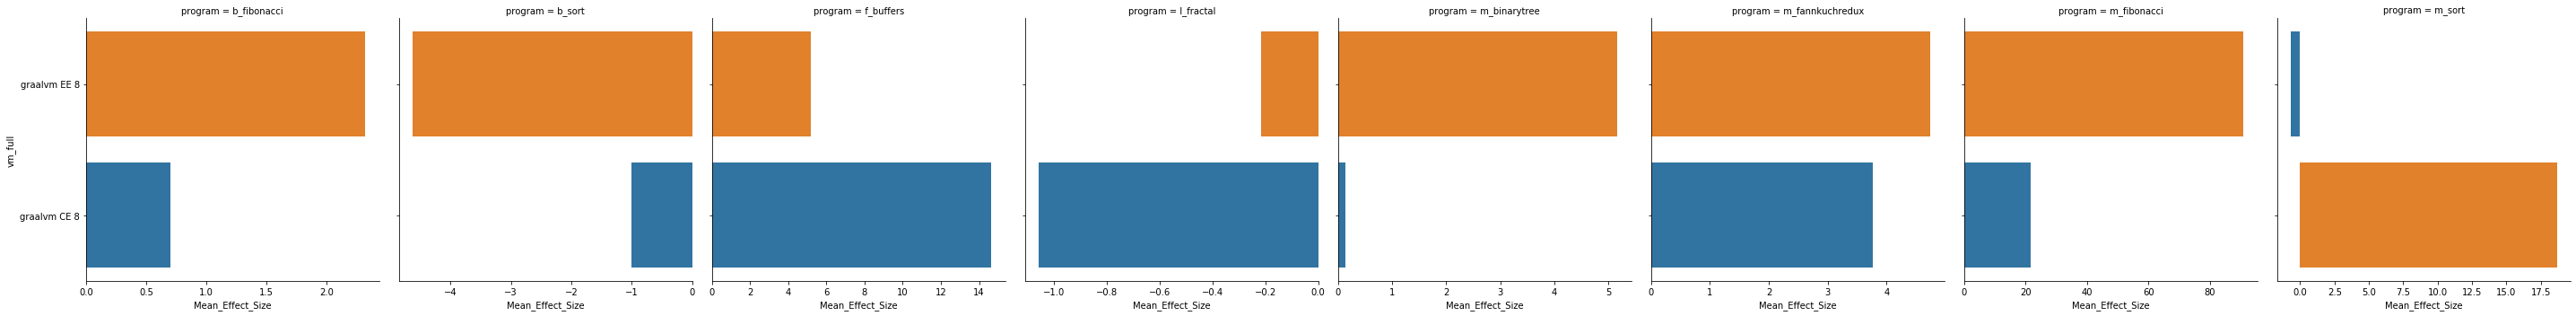

In [11]:
sns.catplot(x="Mean_Effect_Size", y="vm_full", col="program", kind="bar", data=effectSize, sharex=False, legend_out=True)

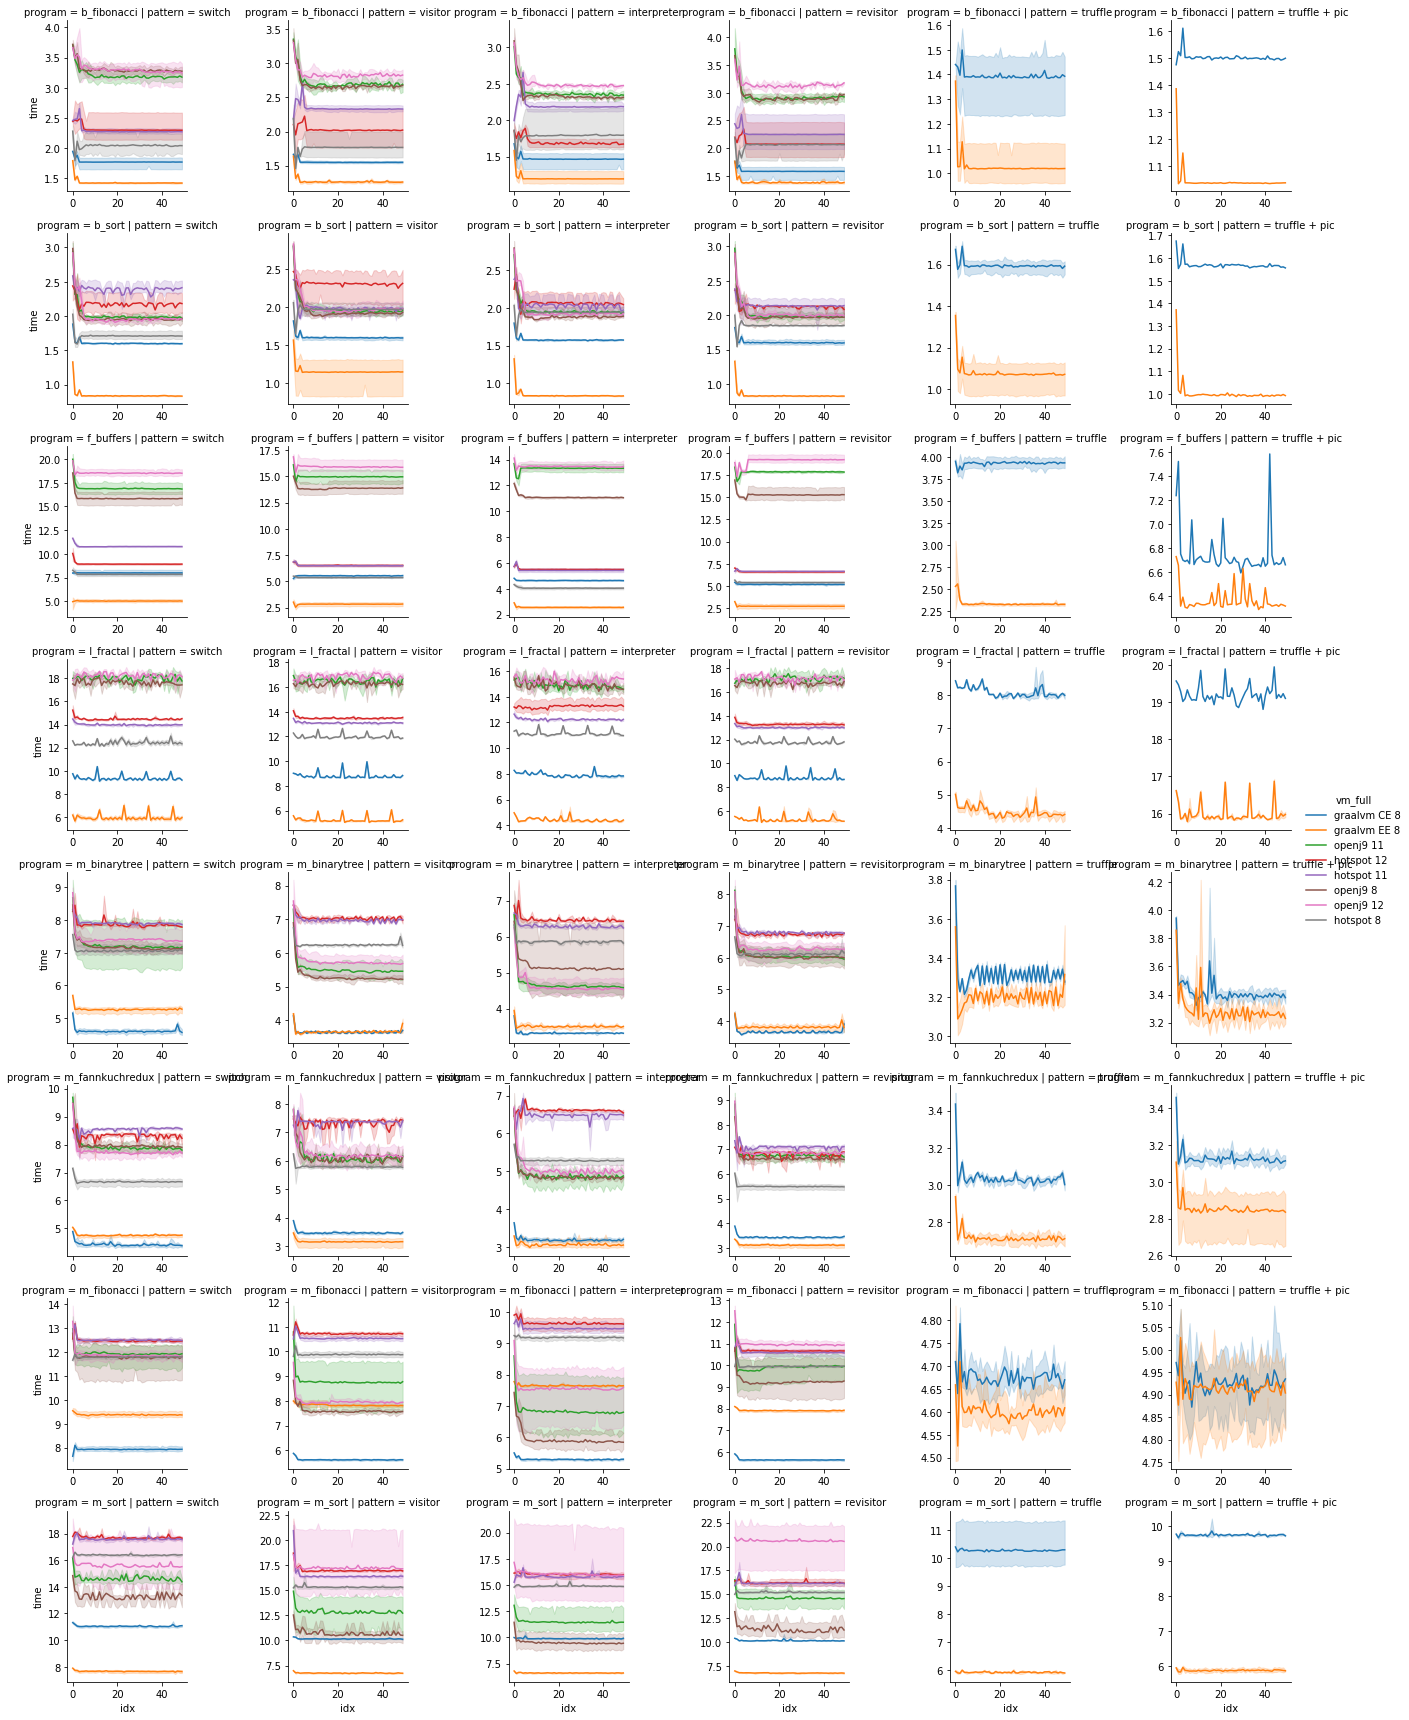

In [12]:
grid = sns.FacetGrid(df, col="pattern", row="program", hue="vm_full", sharex=False, sharey=False)
grid.map(sns.lineplot, "idx", "time").add_legend()

In [13]:
#grid = sns.FacetGrid(df, col="program", row="pattern", hue="vm_full", sharex=False, sharey=False)
#grid.map(sns.lineplot, "idx", "time")

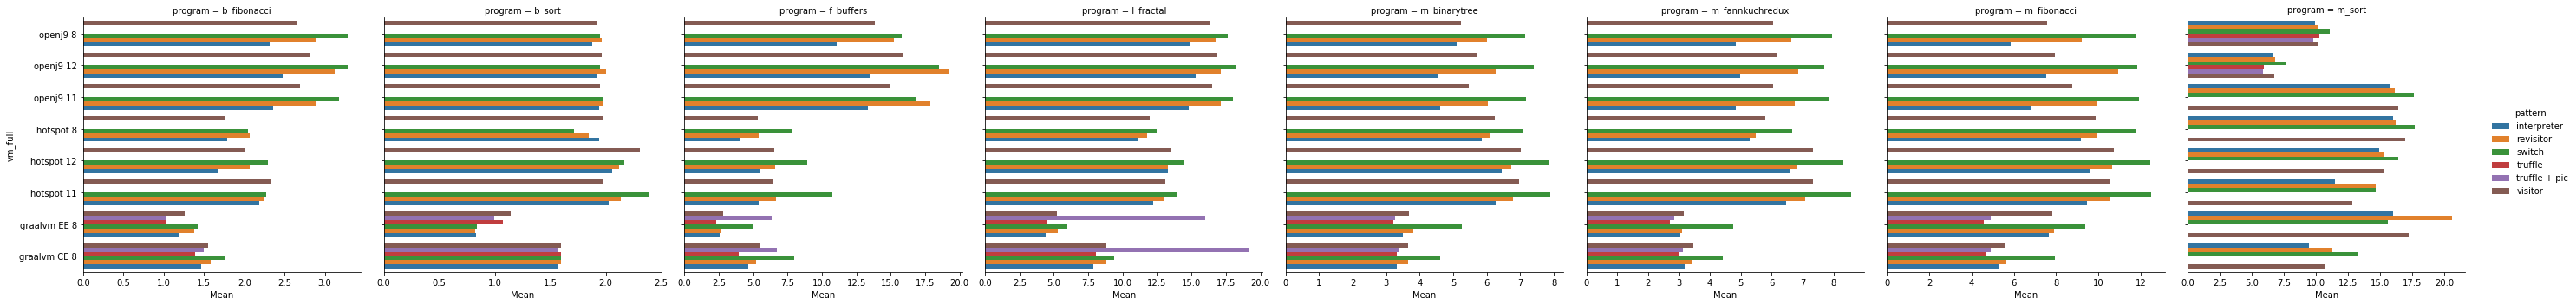

In [14]:
sns.catplot(x="Mean", y="vm_full", col="program", hue="pattern", kind="bar", data=means, sharex=False, legend_out=True)

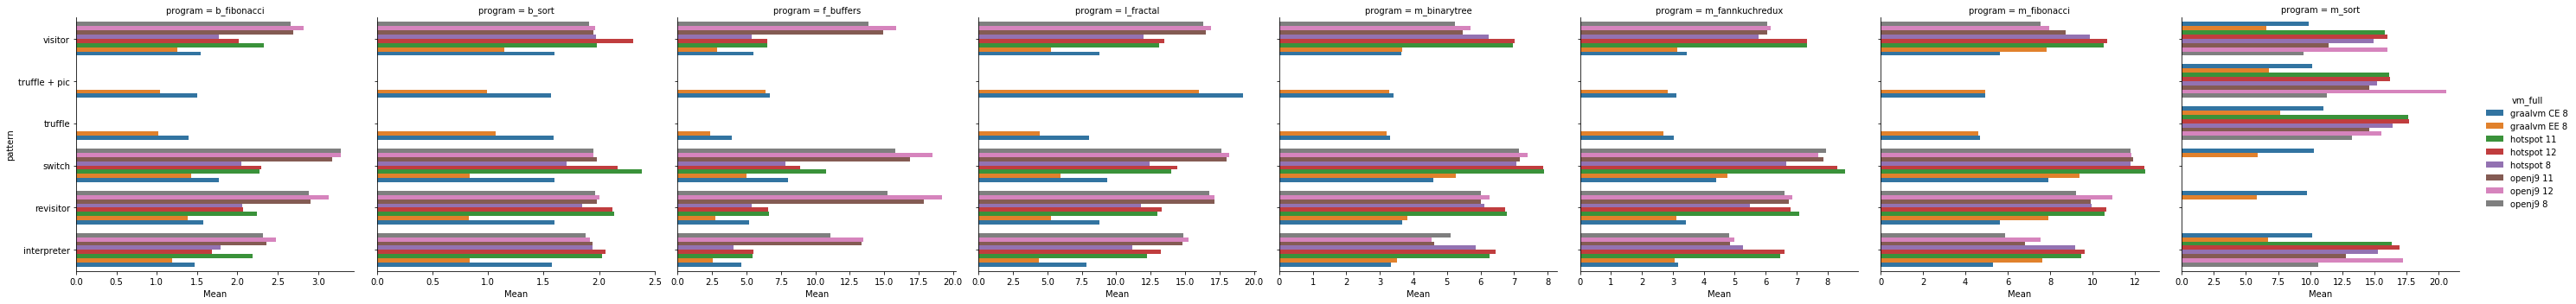

In [15]:
sns.catplot(x="Mean", y="pattern", col="program", hue="vm_full", kind="bar", data=means, sharex=False, legend_out=True)

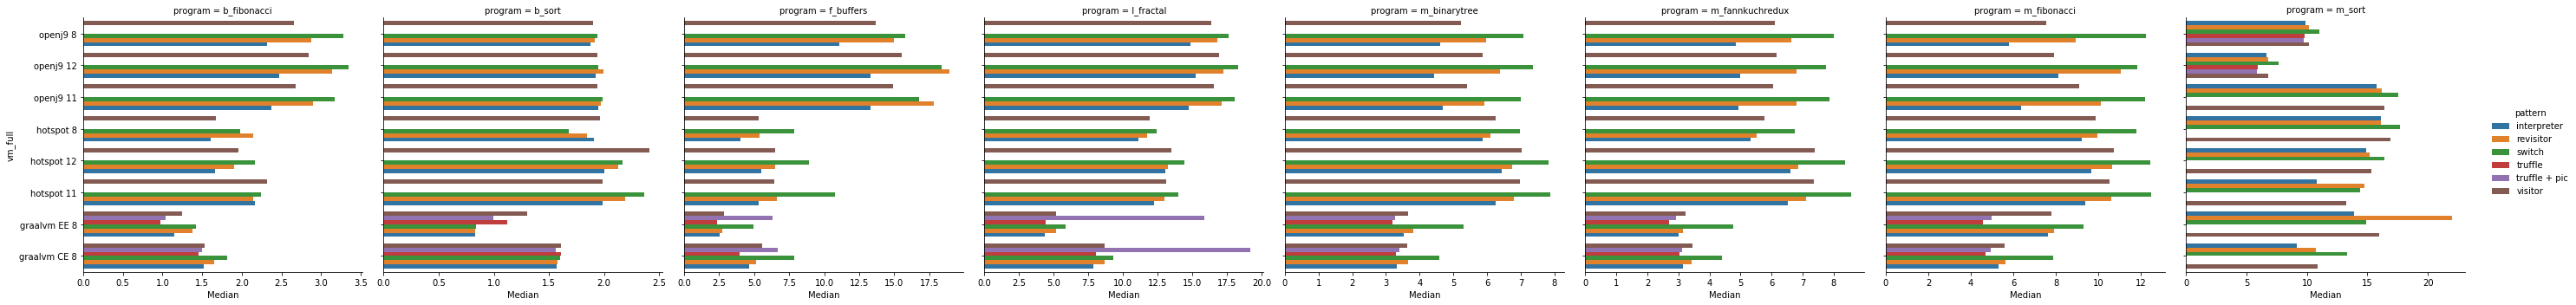

In [16]:
sns.catplot(x="Median", y="vm_full", col="program", hue="pattern", kind="bar", data=medians, sharex=False, legend_out=True)

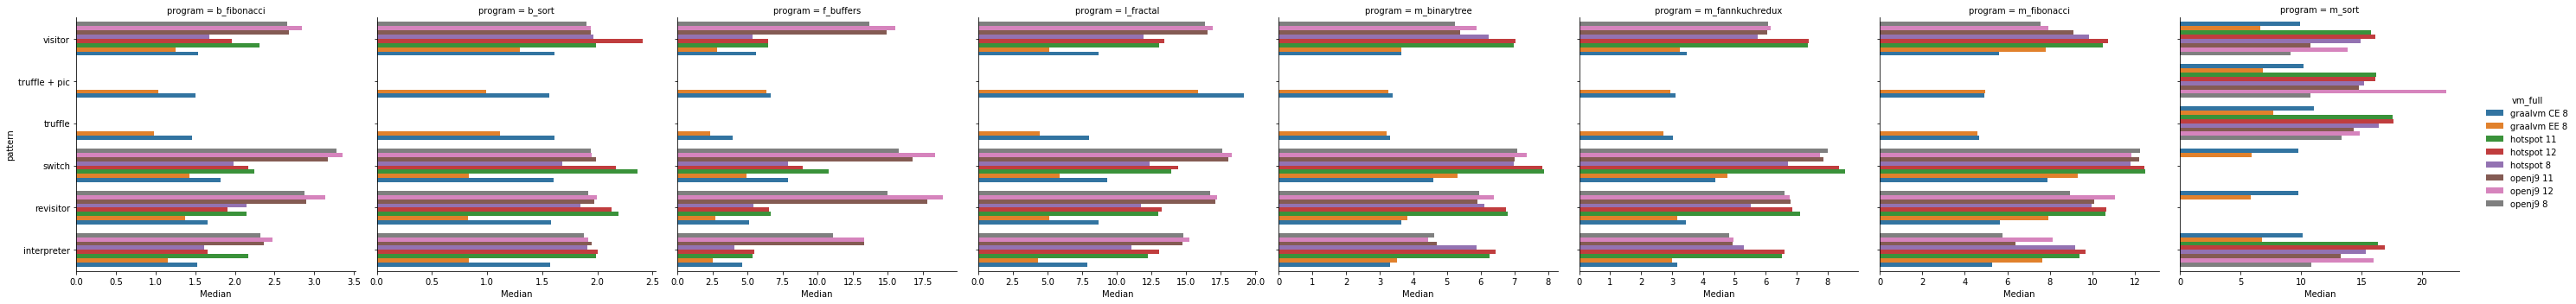

In [17]:
sns.catplot(x="Median", y="pattern", col="program", hue="vm_full", kind="bar", data=medians, sharex=False, legend_out=True)

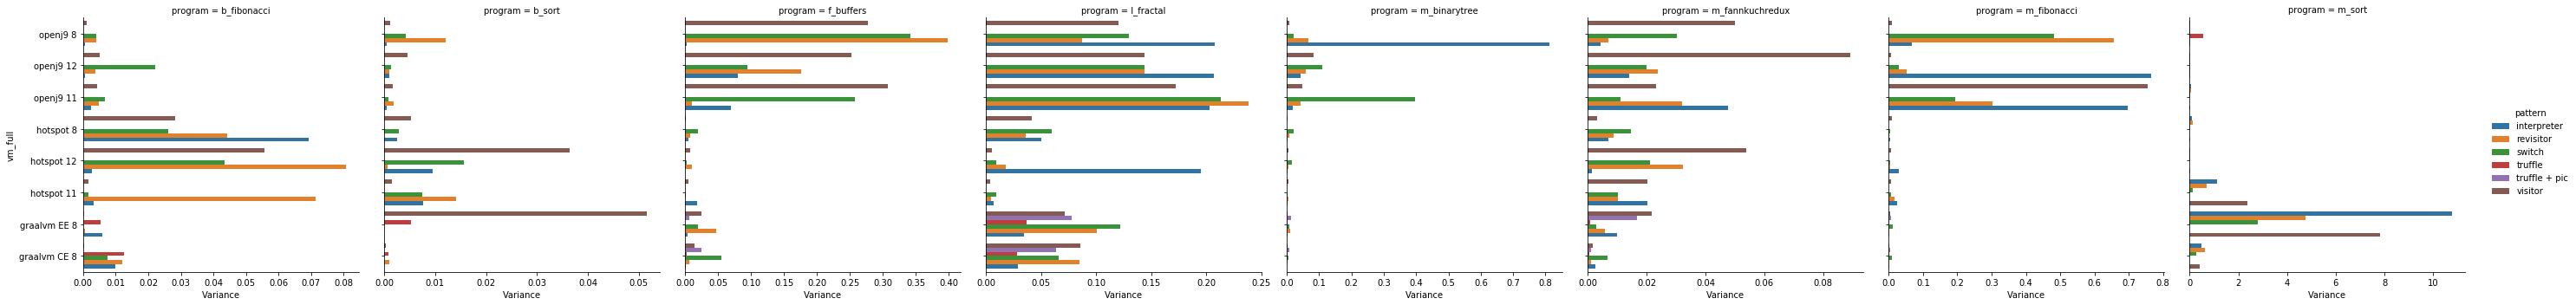

In [18]:
sns.catplot(x="Variance", y="vm_full", col="program", hue="pattern", kind="bar", data=variances, sharex=False, legend_out=True)

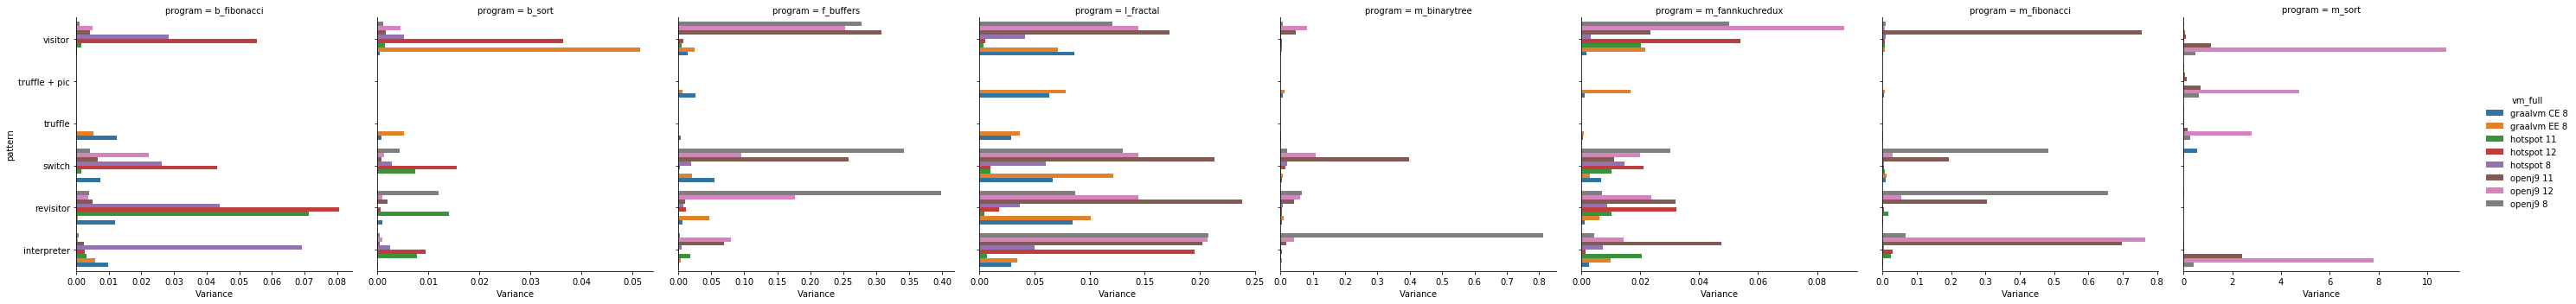

In [19]:
sns.catplot(x="Variance", y="pattern", col="program", hue="vm_full", kind="bar", data=variances, sharex=False, legend_out=True)

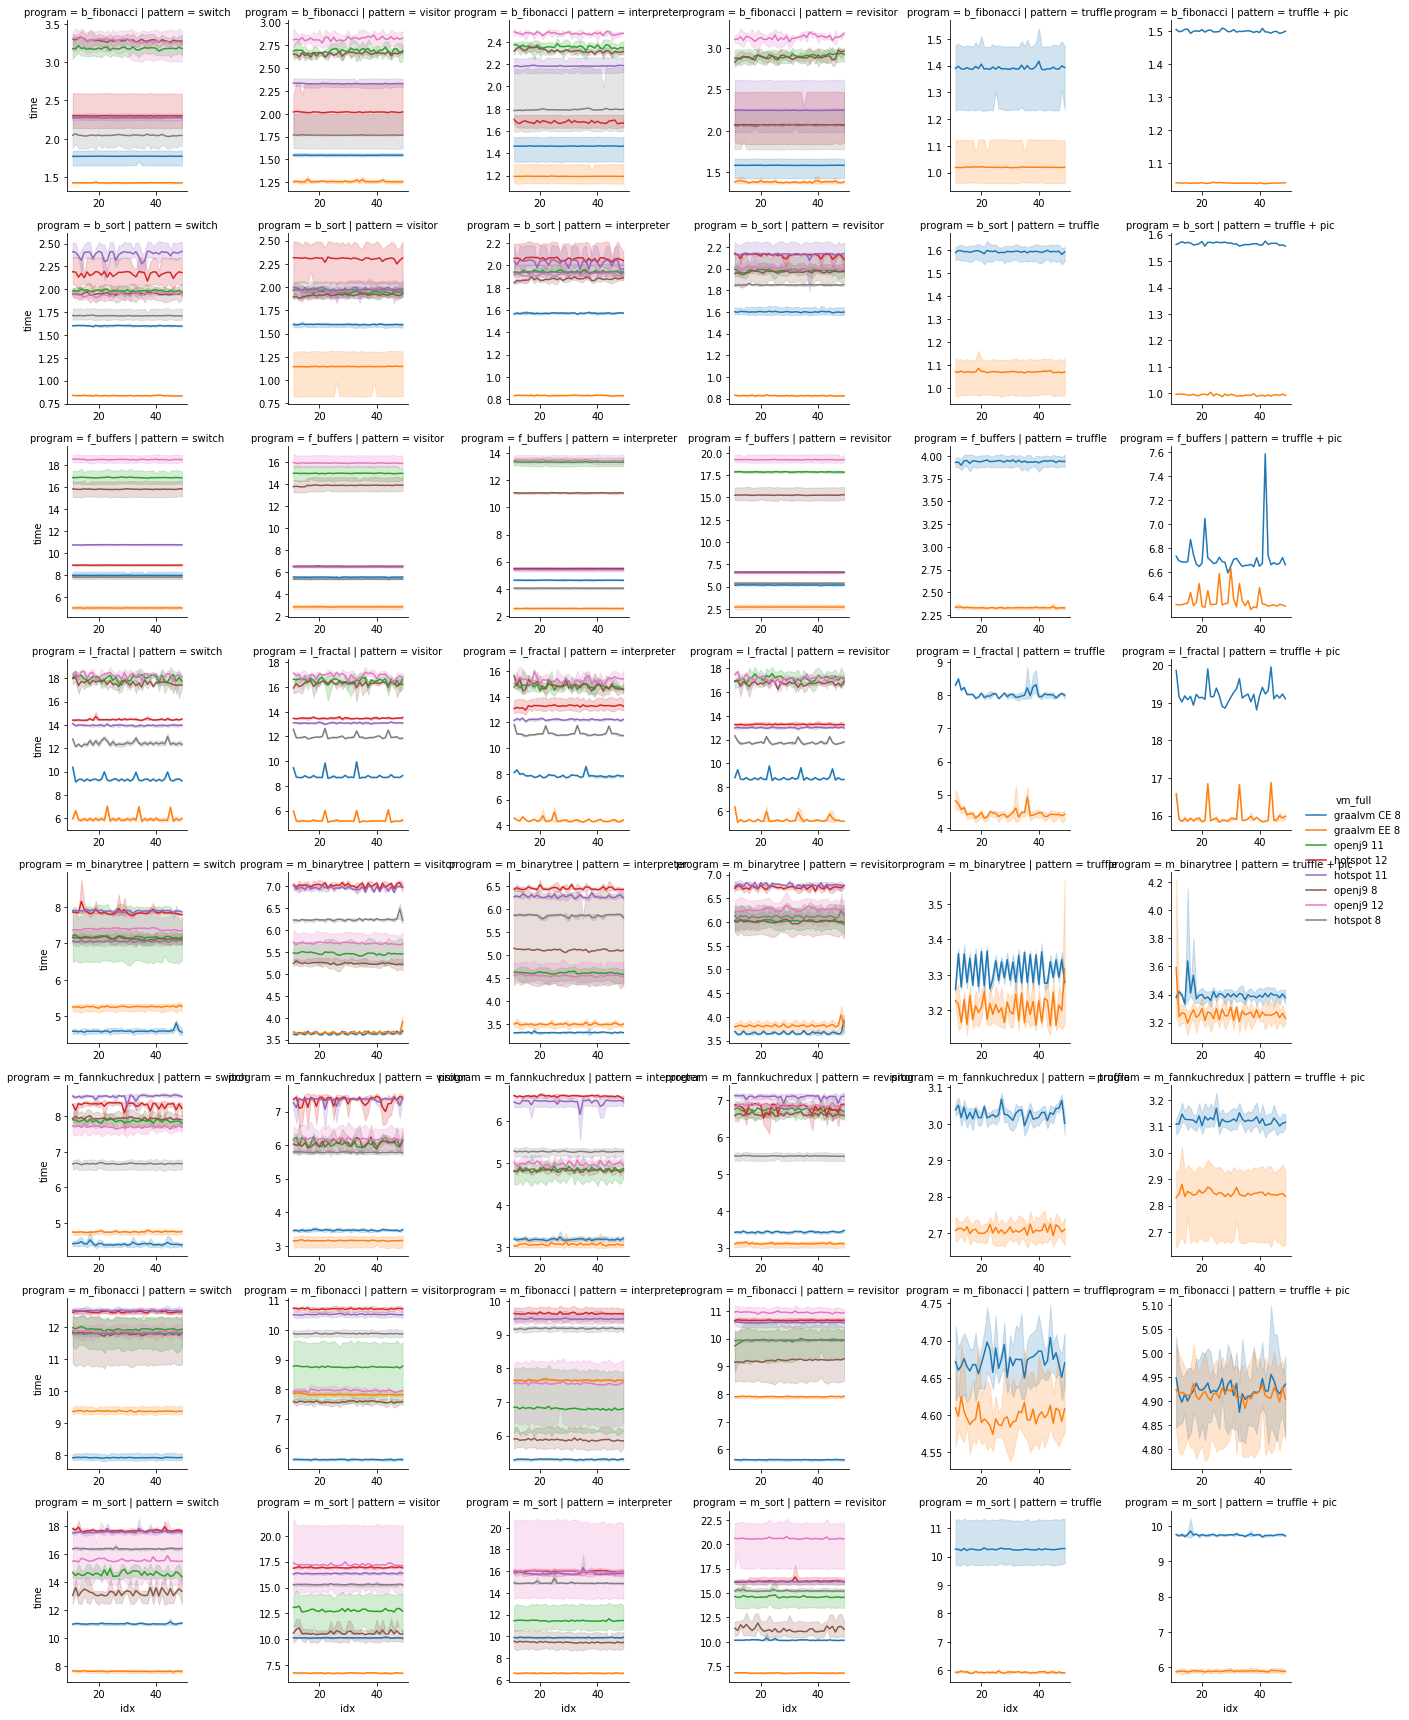

In [20]:
grid = sns.FacetGrid(nwp, col="pattern", row="program", hue="vm_full", sharex=False, sharey=False)
grid.map(sns.lineplot, "idx", "time").add_legend()

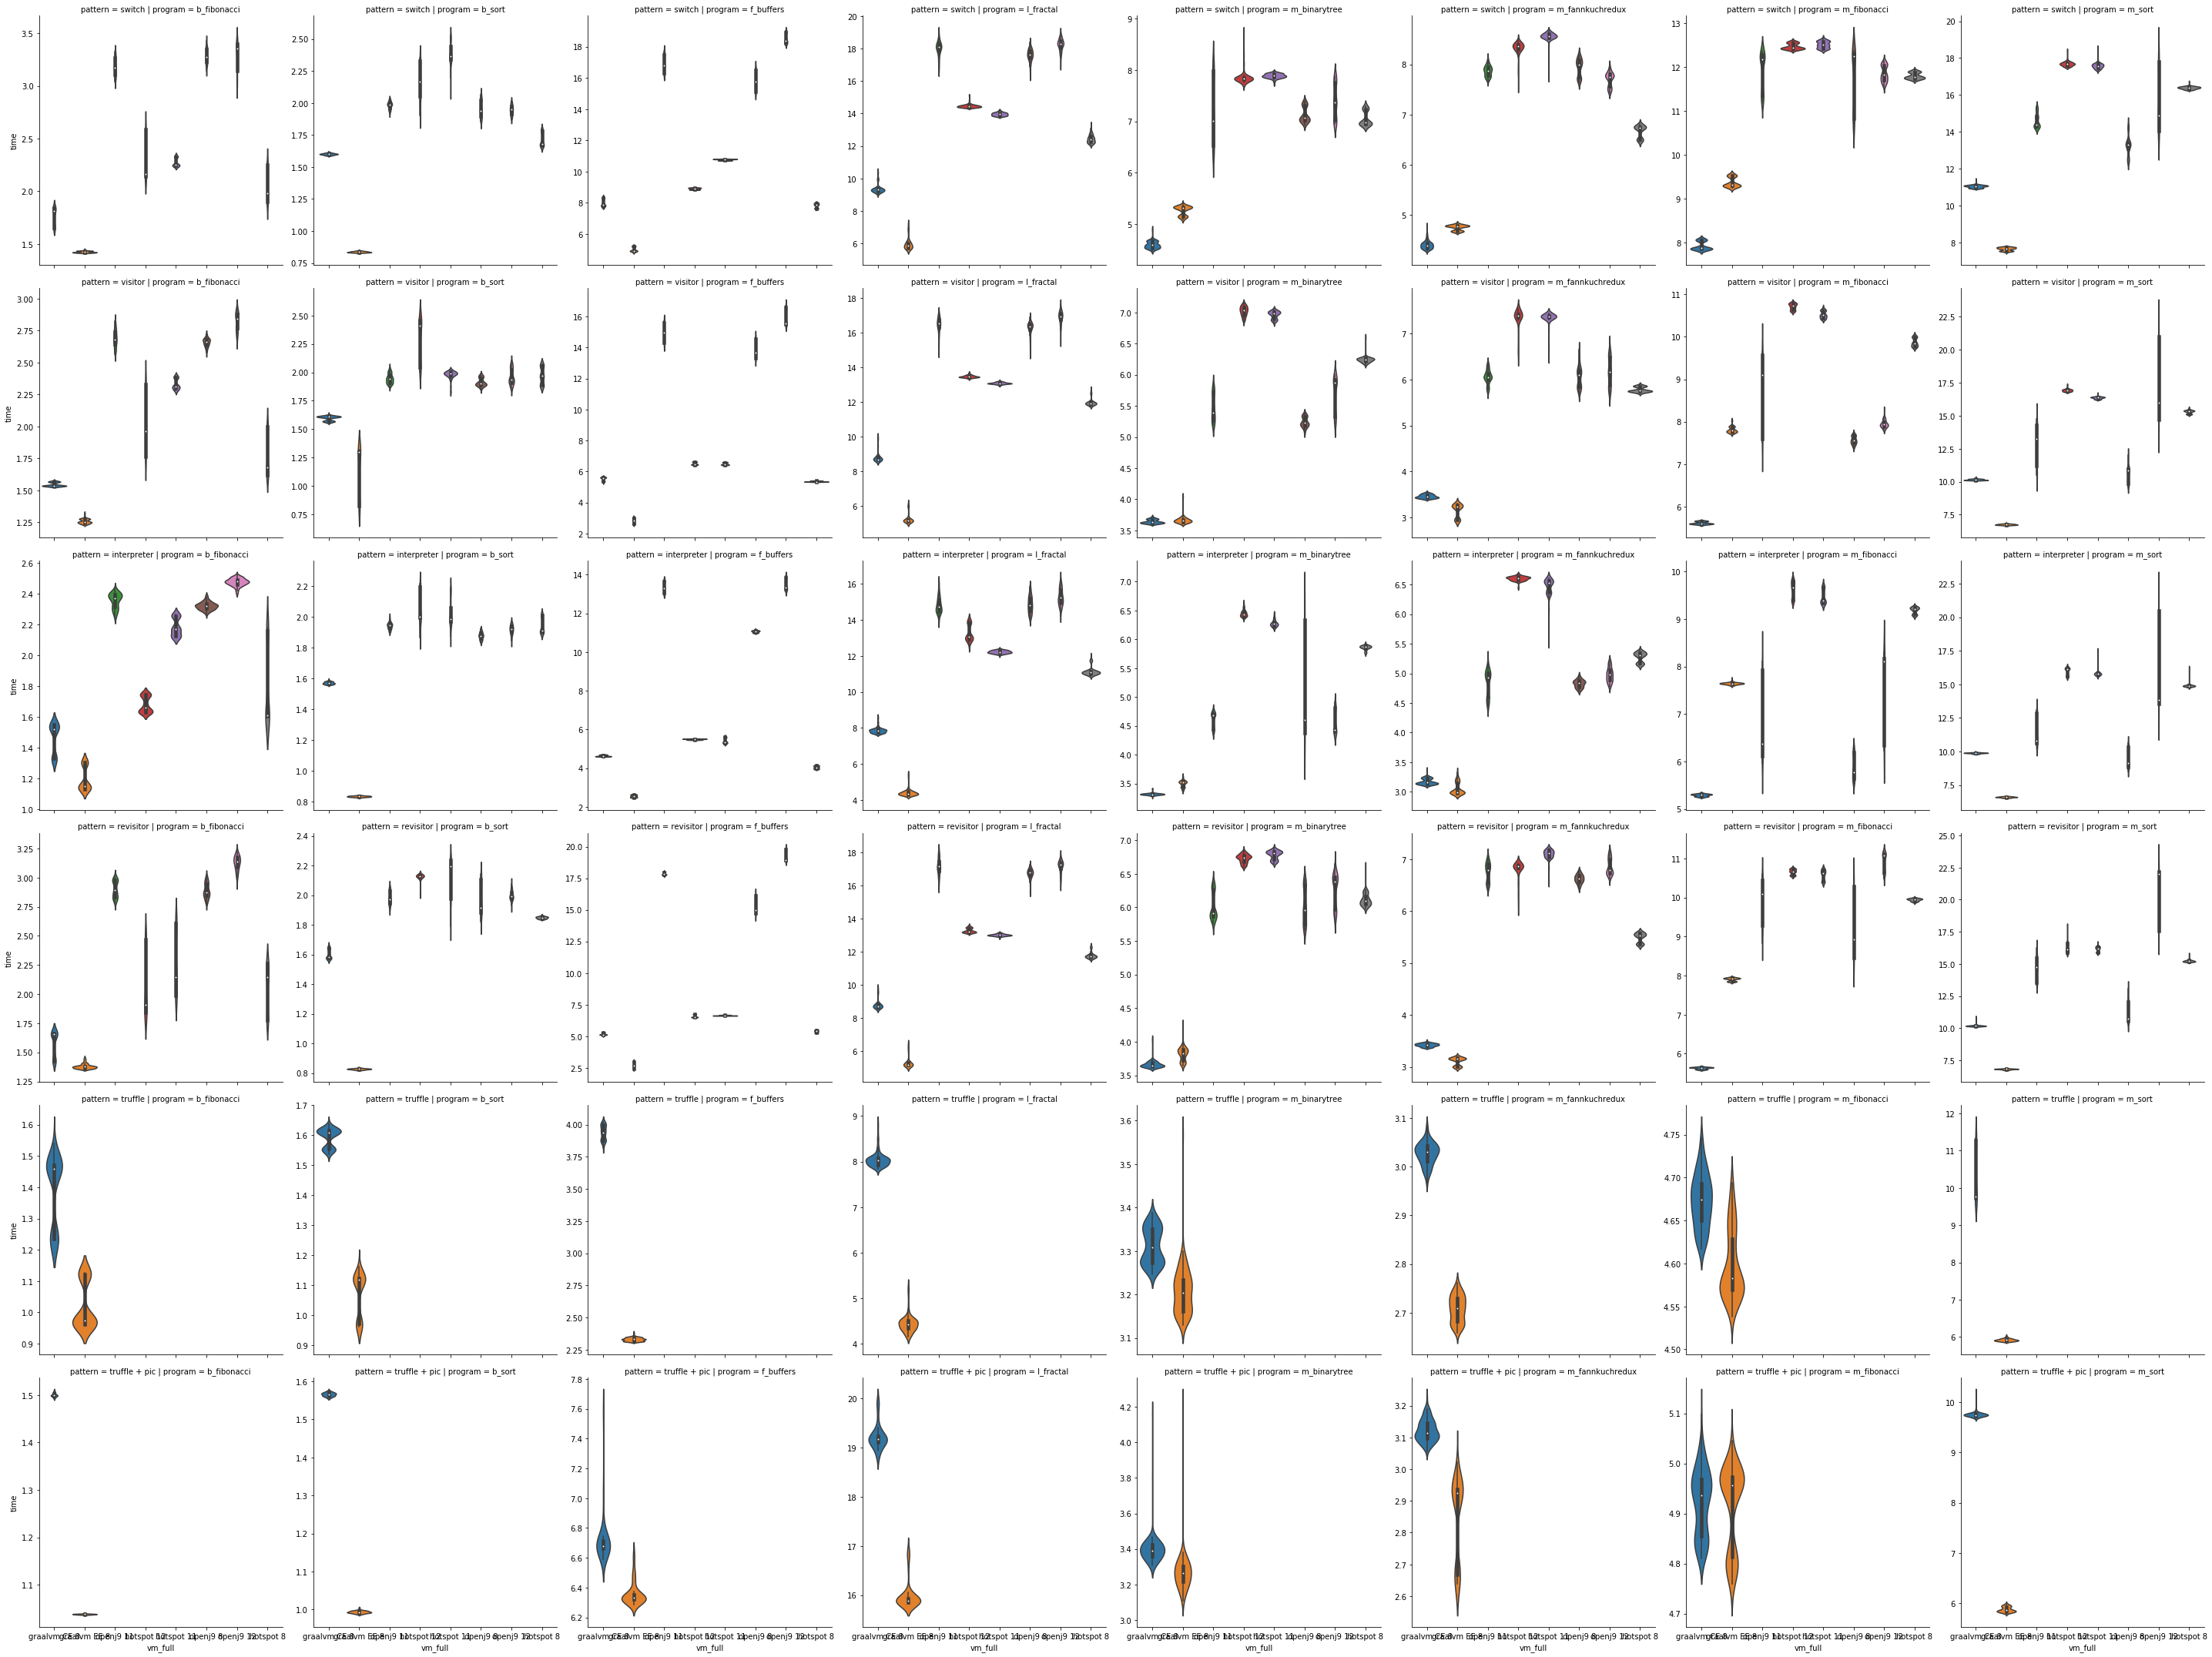

In [21]:
sns.catplot(x="vm_full", y="time", col="program", row="pattern", kind="violin", data=nwp, sharey=False, legend_out=True)

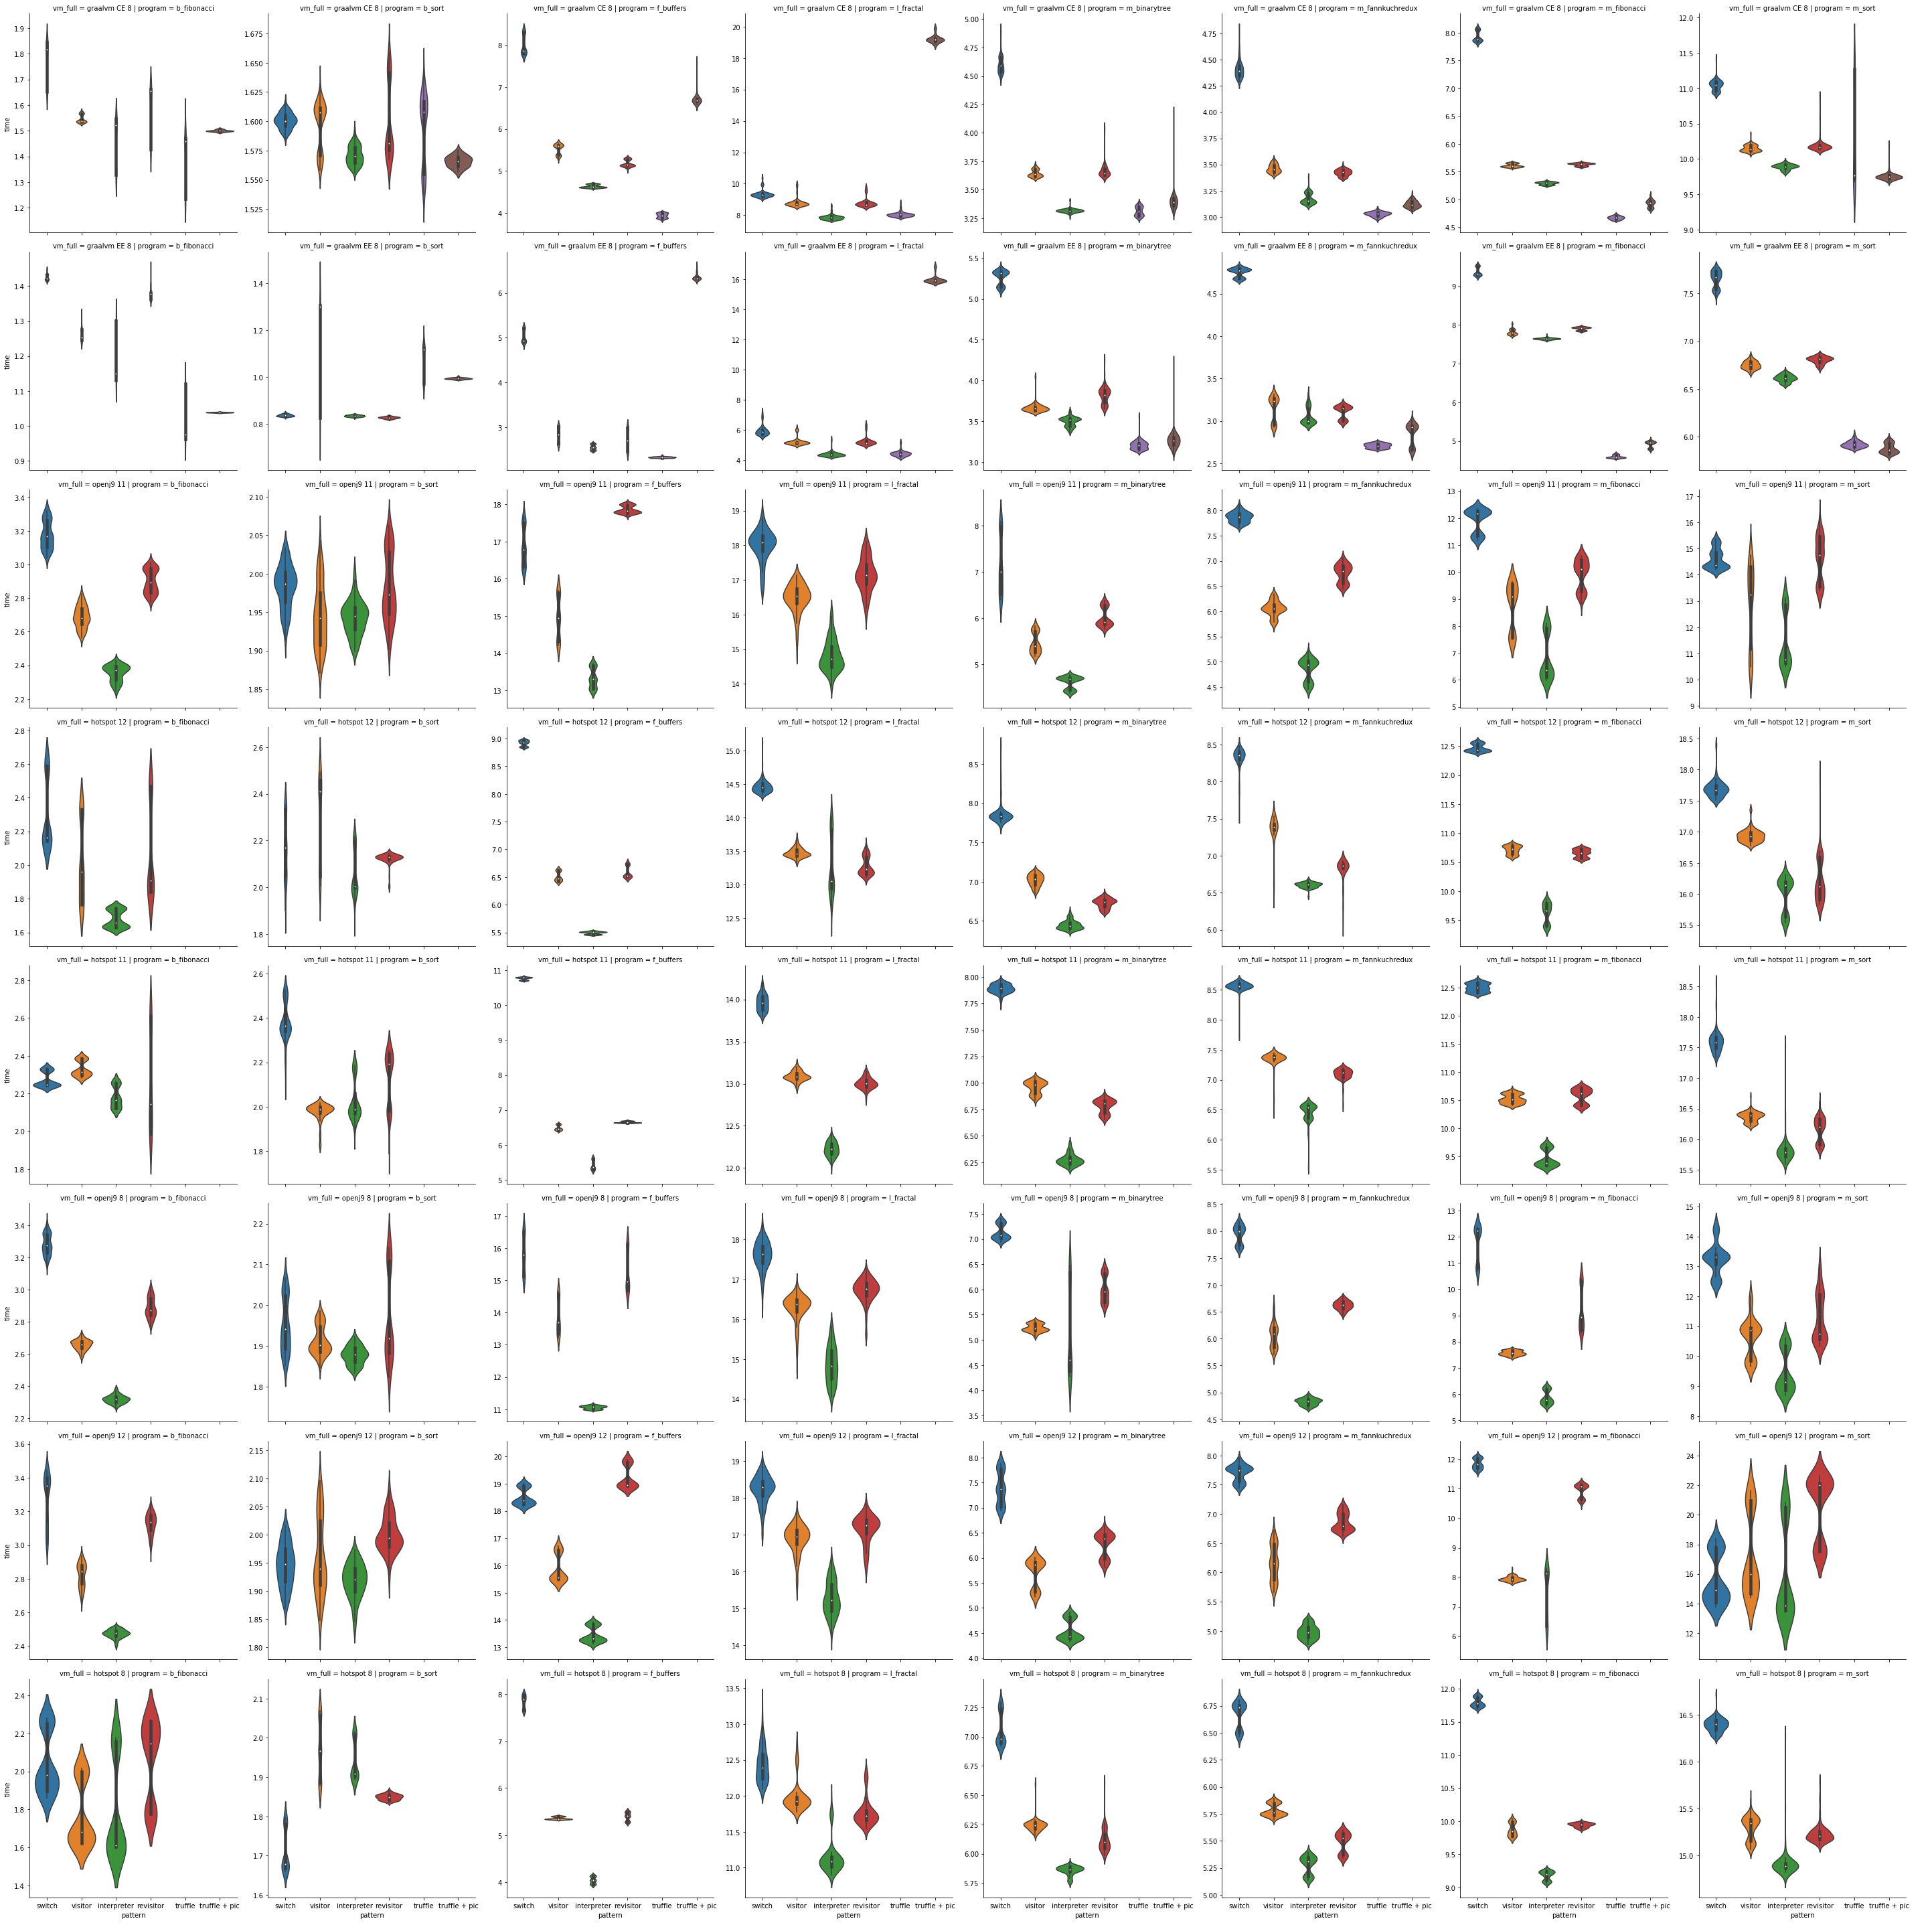

In [22]:
sns.catplot(x="pattern", y="time", col="program", row="vm_full", kind="violin", data=nwp, sharey=False).add_legend()

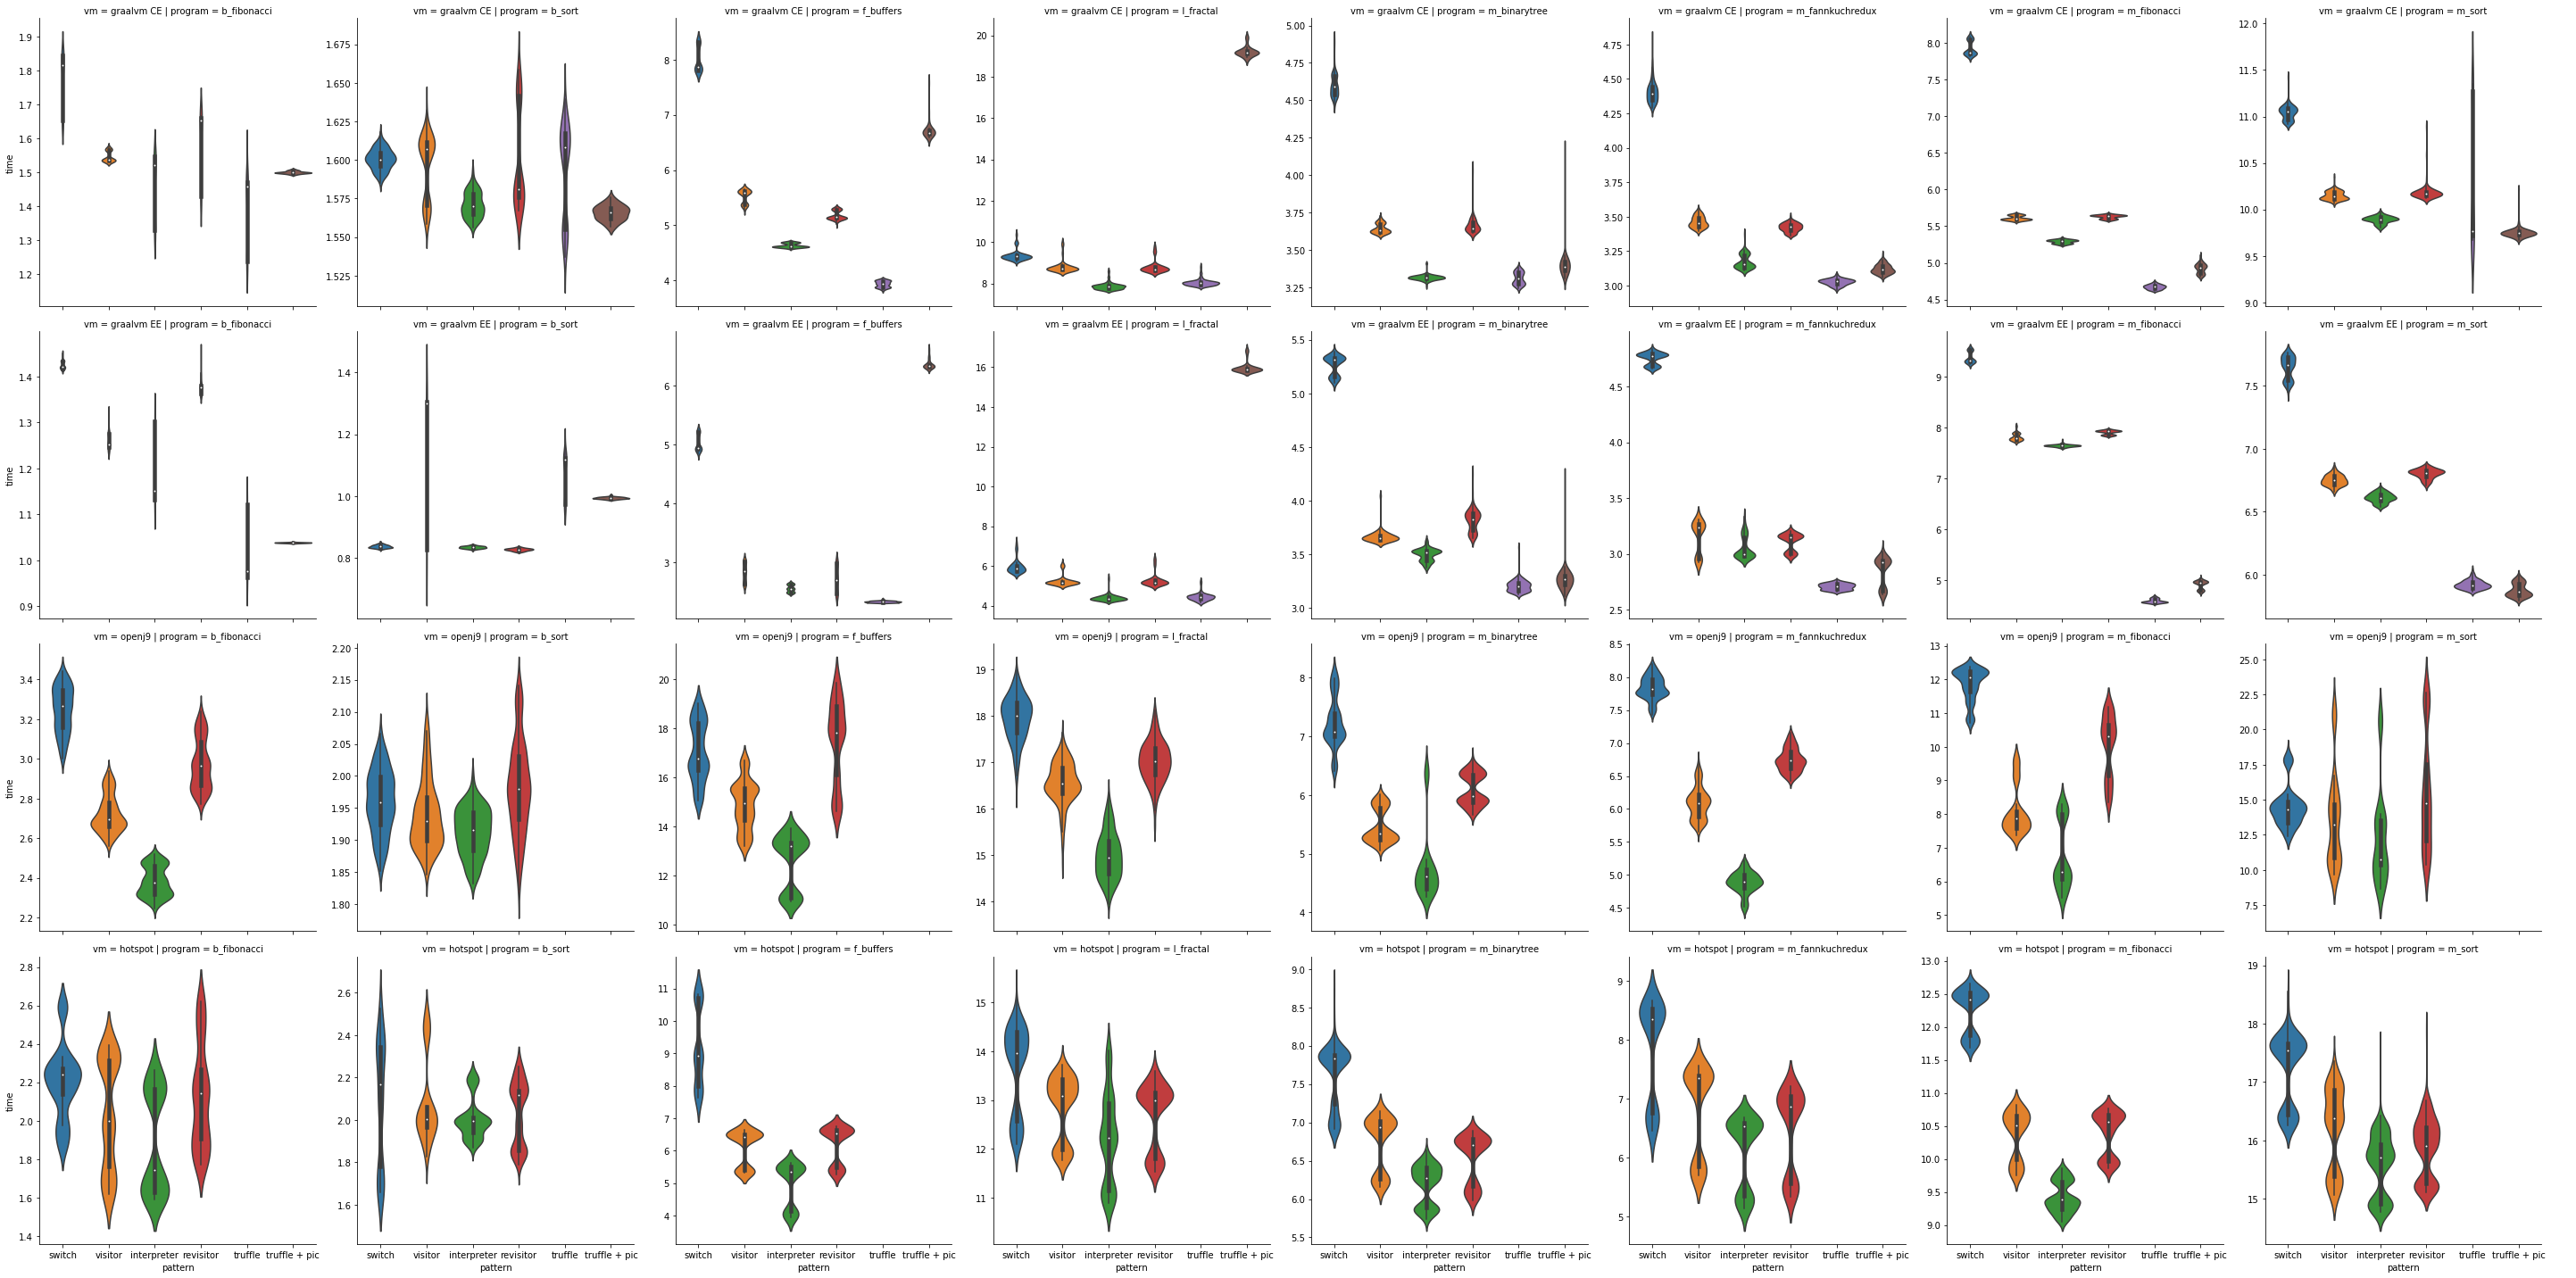

In [23]:
sns.catplot(x="pattern", y="time", col="program", row="vm", kind="violin", data=nwp, sharey=False).add_legend()